# SVM Start to finish

In this notebook we will solve for predicting credit card defaults using SVM and we will be using dataset from UCI ML repository

In [67]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV ###to perform cross validation
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [68]:
## import the data

df = pd.read_csv("default of credit card clients.csv", header =1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [69]:
df.rename({"default payment next month":"DEFAULT"},axis = 'columns', inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [70]:
df.drop('ID',axis = 'columns',inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [71]:
###let's identify missing data

In [72]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [73]:
df['SEX'].unique()

array([2, 1])

In [74]:
df['EDUCATION'].unique()   ###it contains three more types 0,5,6

array([2, 1, 3, 5, 4, 6, 0])

In [75]:
df['MARRIAGE'].unique()   #### this contains 0

array([1, 2, 3, 0])

In [76]:
###let's check how many rows contain missing values {assuming 0s to be missing values}

len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])    ### loc is the location function used to find the location of a particular row

68

In [77]:
len(df)

30000

In [78]:
df_no_missing_values = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [79]:
len(df_no_missing_values)

29932

In [80]:
df_no_missing_values['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [81]:
df_no_missing_values['MARRIAGE'].unique()

array([1, 2, 3])

In [82]:
###downsample

df_no_default = df_no_missing_values[df_no_missing_values['DEFAULT'] == 0]
df_default = df_no_missing_values[df_no_missing_values['DEFAULT'] == 1]

In [97]:
df_no_default_downsampled = resample(df_no_default, replace = False, n_samples = 1000, random_state = 42)

len(df_no_default_downsampled)

1000

In [98]:
df_default_downsampled = resample(df_default, replace = False, n_samples = 1000, random_state = 42)

len(df_default_downsampled)

1000

In [99]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

In [100]:
### split the data into two parts

X = df_downsample.drop('DEFAULT', axis = 1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [101]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [102]:
### one hot encoding

X_encoded = pd.get_dummies(X, columns = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,False,True,False,False,False,False,False,False,False,False
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,False,False,False,True,False,False,False,False,False,False
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,False,False,False,True,False,False,False,False,False,False
22974,210000,32,355,975,410,0,0,0,979,412,...,False,True,False,False,False,False,False,False,False,False
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,False,False,False,True,False,False,False,False,False,False


In [103]:
X_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_4_-2',
       'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_7', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-2', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3'

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
X_train_scaled =scale(X_train)
X_test_scaled = scale(X_test)

In [109]:
#### building a pleminiary SVM
clf_svm = SVC(random_state =  42)
clf_svm.fit(X_train_scaled, y_train)
predictions = clf_svm.predict(X_test_scaled)

In [106]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm,
                      X_test_scaled, 
                      y_test, 
                      values_format = 'd', 
                      display_labels = ["Did not default", "Defaulted"])

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/aditi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

In [107]:
!pip install --upgrade scikit-learn

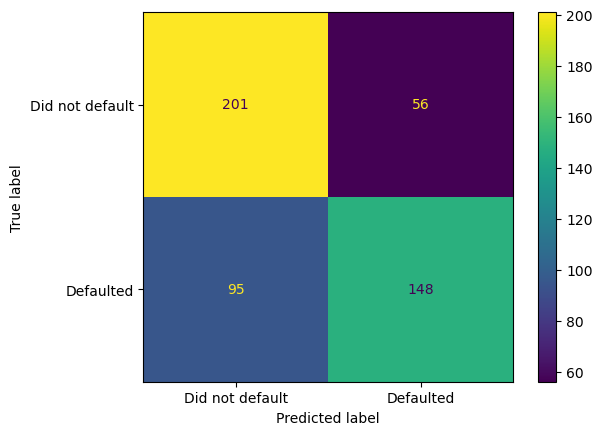

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# confusion_matrix(clf_svm,
#                       X_test_scaled, 
#                       y_test, 
#                       values_format = 'd', 
#                       display_labels = ["Did not default", "Defaulted"])



cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=["Did not default", "Defaulted"])

disp.plot()
plt.show()

In [113]:
### optimize parameters with cross validation & grid search

param_grid = [
    {
        'C' : [0.5,1,10,100],
        'gamma' : ['scale',1,0.1,0.01,0.001,0.0001],
        'kernel': ['rbf']
    },
]

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv = 5,
        scoring = 'accuracy',
        verbose =0
)

optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [115]:
clf_svm = SVC(random_state = 42, C=100, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)
predictions = clf_svm.predict(X_test_scaled)

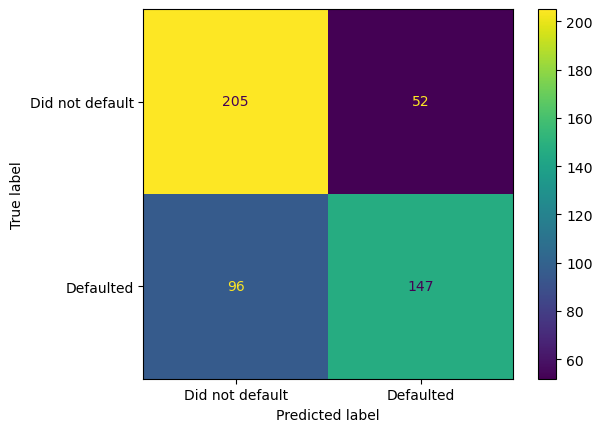

In [116]:
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=["Did not default", "Defaulted"])

disp.plot()
plt.show()